In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.shape

(1252, 6)

In [4]:
# Check the unique values of "IsTrading"
crypto_df['IsTrading'].unique()

array([ True, False])

In [5]:
# Check how many 'True' and 'False' values there are in the dataframe
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Keep only records that are being traded i.e., the 'IsTrading' value is 'True'.
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
crypto_df.shape

(1144, 6)

In [8]:
# Check that only 'True' values remain for 'IsTrading' meaning 
# those cryptocurrencies that are being traded.
crypto_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [9]:
# Drop the 'IsTrading' column as it is no longer needed.
crypto_df.drop('IsTrading', axis=1, inplace=True)

In [10]:
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
crypto_df.shape

(1144, 5)

In [12]:
# Check for any null values
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [13]:
# Drop all NaN values
crypto_cleaned_df = crypto_df.dropna()

In [14]:
crypto_cleaned_df.shape

(685, 5)

In [15]:
crypto_cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [16]:
# Keep for cryptocurrencies that have been mined.
# The total coins mines should be greater than zero.
crypto_cleaned_df = crypto_cleaned_df[crypto_cleaned_df['TotalCoinsMined']>0]

In [17]:
crypto_cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [18]:
# The 'CoinName' column does not contribute to the analysis of the data
# so it will be dropped.
crypto_cleaned_df.drop(['CoinName'], axis=1, inplace=True)

In [19]:
crypto_cleaned_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [20]:
# Convert the remaining features with text values into numerical values.
# Use Pandas to create dummy variables.
X = pd.get_dummies(crypto_cleaned_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(X)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [22]:
# Applying PCA to reduce dimensions.  
from sklearn.decomposition import PCA

# Initialize PCA model and preserve 90% of the data.
pca = PCA(n_components=0.90)

# Get two principal components for the data.
pca_transformed_data  = pca.fit_transform(crypto_scaled)

In [23]:
pca_transformed_data.shape

(532, 74)

In [24]:
# Initialize t-SNE model 
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)

In [25]:
# Reduce dimensions to two run t-SNE on the principal components - the
# output of the PCA transformation.
transformed_features  = tsne.fit_transform(pca_transformed_data)
transformed_features 

array([[ -0.09746864,   8.316131  ],
       [  1.1397702 ,  12.262041  ],
       [  3.6981115 ,  17.170172  ],
       ...,
       [ -5.2867565 , -14.5897255 ],
       [-10.998779  ,  -9.667303  ],
       [  5.3878174 ,  -0.8669948 ]], dtype=float32)

In [26]:
transformed_features.shape

(532, 2)

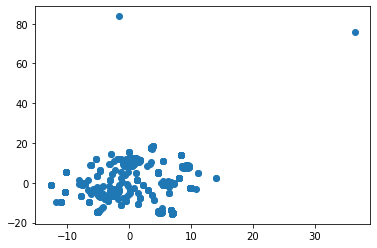

In [27]:
# Visualize the clusters
plt.scatter(transformed_features[:, 0], transformed_features[:,1])
plt.show()

In [28]:
# Cluster analysis with KMeans. Perform KMeans to find the best value for k
from sklearn.cluster import KMeans

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

C:\Users\pined\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,75890.828125
1,2,40777.898438
2,3,30406.394531
3,4,21141.957031
4,5,14457.378906
5,6,11657.057617
6,7,9326.795898
7,8,7524.154297
8,9,6170.309570
9,10,5526.247559


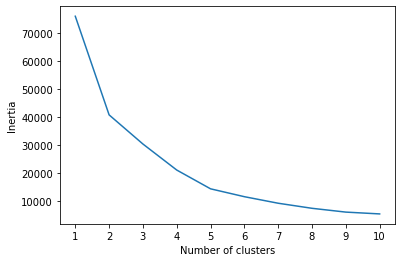

In [29]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
# Initialize the k-means model. 
# Use K number = 5 as it looks like the elbow of the curve.
model = KMeans(n_clusters=5, random_state=0)
model.fit(transformed_features)

KMeans(n_clusters=5, random_state=0)

In [31]:
# Predict clusters
predictions = model.predict(transformed_features)
predictions

array([0, 0, 0, 4, 1, 1, 2, 1, 1, 1, 2, 1, 4, 4, 1, 0, 1, 1, 0, 0, 1, 1,
       4, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 4, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 4, 1, 1, 1, 0, 1, 1, 2, 1, 4, 2, 0, 1,
       4, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 4, 1, 4, 0, 2, 4, 4, 4, 1, 0,
       0, 1, 1, 1, 1, 2, 1, 4, 0, 0, 4, 4, 0, 2, 1, 4, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 4, 1, 2, 0, 1, 4, 4, 0,
       1, 2, 1, 1, 2, 1, 0, 4, 4, 0, 1, 4, 0, 1, 1, 4, 2, 1, 4, 4, 0, 0,
       2, 1, 4, 1, 1, 2, 2, 4, 0, 2, 1, 1, 2, 4, 4, 0, 2, 1, 2, 0, 0, 0,
       0, 1, 2, 1, 2, 0, 4, 4, 4, 2, 0, 1, 0, 1, 2, 4, 1, 1, 0, 2, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 4, 0,
       1, 0, 0, 2, 4, 0, 2, 0, 0, 2, 1, 1, 4, 4, 0, 4, 2, 0, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 0, 1, 4, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       4, 2, 1, 2, 4, 2, 0, 0, 4, 1, 2, 1, 0, 1, 4, 1, 4, 0, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 4, 0, 1, 1, 4, 2, 1, 2, 4, 2,

In [32]:
crypto_cleaned_df['class'] = model.labels_
crypto_cleaned_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
42,Scrypt,PoW/PoS,4.199995e+01,42,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,0
BTC,SHA-256,PoW,1.792718e+07,21000000,4
ETH,Ethash,PoW,1.076842e+08,0,1


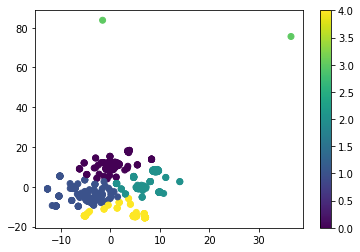

In [33]:
# Plot the reduced dimensions from tsne and colorcode them with the labels
plt.scatter(transformed_features[:, 0], transformed_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()


The cryptocurrencies are clustered together as 1 for this dataset. The data is mostly a blob comprised of 4 clusters. 